This notebook is designed to give you the opportunity to build intuition about how different galaxy physical parameters affect their spectra. It also gives you a basic introduction to making models with bagpipes. All the information you need to complete them should be available in the [Bagpipes documentation](https://bagpipes.readthedocs.io), or the [Jupyter notebook examples](https://github.com/ACCarnall/bagpipes/tree/master/examples) on the Bagpipes github repository. I'll be on hand during the session to discuss things with you, and provide advice if anything is confusing.

I'd also recommend pipes_vis: https://www.github.com/HinLeung622/pipes_vis and sengi: https://www.christopherlovell.co.uk/sengi/index.html.

If you're new to Google Colab, this file is a Jupyter notebook running inside its own virtual machine on the Google servers, which I've pre-loaded with all the necessary software. This should allow you to get straight on with running the code without having to worry about installation issues.

You can copy this document into your own Google drive to begin editing it. If you get into trouble, you can restart or factory reset the notebook/virtual machine under the Runtime menu at the top. You'll need to run the first code cell to install the necessary software before getting started.

In [1]:
# This first cell sets up the virtual machine with all the necessary software.
# There should be no need to edit this cell, just scroll down...

# Install Bagpipes and python dependencies
!pip install bagpipes

# Install MultiNest
!git clone https://www.github.com/johannesbuchner/multinest.git
!cd multinest/build && cmake .. && make && sudo make install

# Install PyMultiNest (with hacky solution to path issues)
!git clone https://www.github.com/ACCarnall/PyMultiNest
!cp -r PyMultiNest/pymultinest /usr/local/lib/python3.7/dist-packages/

# Install latex for plots
!sudo apt-get install texlive-latex-recommended
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
!wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
!unzip type1cm.zip -d /tmp/type1cm
!cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
!sudo mkdir /usr/share/texmf/tex/latex/type1cm
!sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
!sudo texhash
!apt install cm-super

# Get the filter curves needed for the examples
!git clone https://github.com/ACCarnall/bagpipes
!mv bagpipes/examples/filters .
!rm -r bagpipes

# Adjust the output height to avoid a huge wall of installation text
from IPython import display
display.Javascript("google.colab.output.setIframeHeight('100px');")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.3 MB/s eta 0:00:00
Cloning into 'multinest'...
remote: Enumerating objects: 549, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 549 (delta 65), reused 49 (delta 19), pack-reused 431
Receiving objects: 100% (549/549), 300.02 KiB | 10.00 MiB/s, done.
Resolving deltas: 100% (342/342), done.
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The Fortran compiler identification is GNU 11.4.0
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting Fortran compiler ABI info
-- Dete

<IPython.core.display.Javascript object>

The cell below contains a relatively simple galaxy spectral model built in Bagpipes. By changing the parameters and re-running the cell you can see how each of them changes the star-formation history and the spectrum of the galaxy.

First plot the SFH:


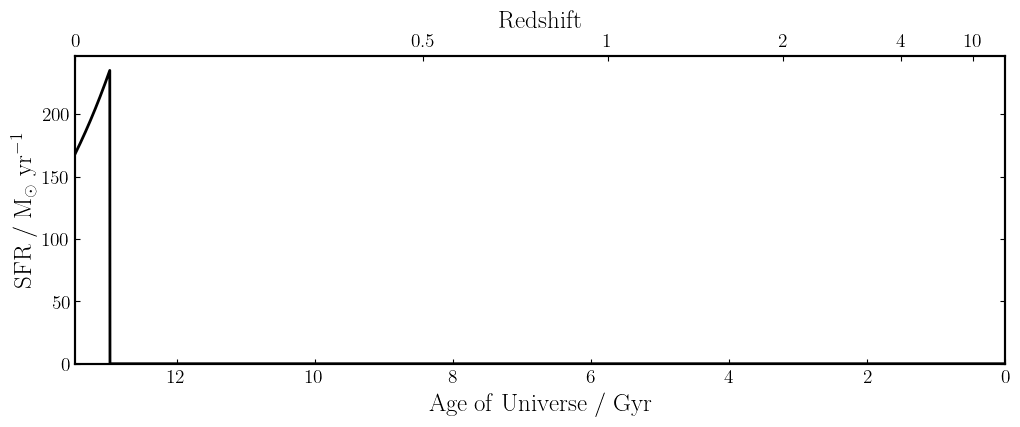

Now plot the spectrum:


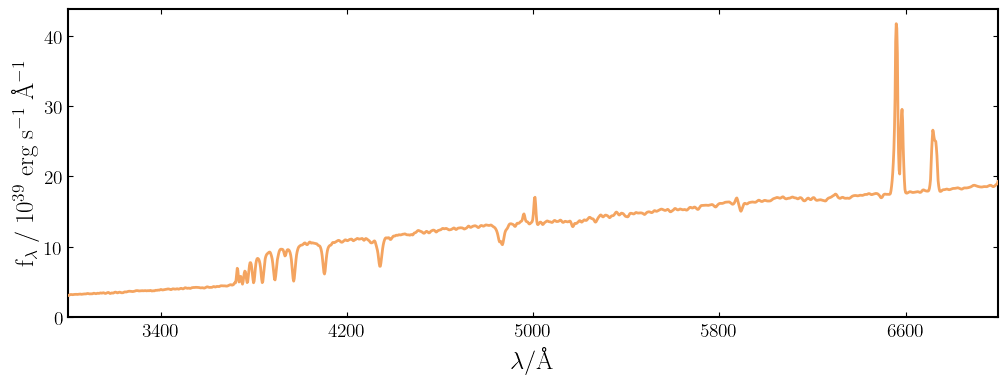

(<Figure size 1200x400 with 1 Axes>,
 [<Axes: xlabel='$\\lambda / \\mathrm{\\AA}$', ylabel='$\\mathrm{f_{\\lambda}}\\ \\mathrm{/\\ 10^{39}\\ erg\\ s^{-1}\\ \\AA^{-1}}$'>])

In [6]:
import bagpipes as pipes
import numpy as np

exp = {}
exp["massformed"] = 11.
exp["metallicity"] = 1.0
exp["tau"] = 1.5
exp["age"] = 0.5

nebular = {}
nebular["logU"] = -3.

dust = {}
dust["type"] = "Calzetti"
dust["Av"] = 3.
dust["eta"] = 2.

model_components = {}
model_components["redshift"] = 0.
model_components["exponential"] = exp
model_components["nebular"] = nebular
model_components["dust"] = dust
model_components["t_bc"] = 0.01
model_components["veldisp"] = 250.

model_galaxy = pipes.model_galaxy(model_components,
                                  spec_wavs=np.arange(3000., 7000., 2.5))

print("First plot the SFH:")
model_galaxy.sfh.plot()

print("Now plot the spectrum:")
model_galaxy.plot()
